## This will be the Main File for our testing adn things. We can read/write etc in this file

## TEST

## Step 1: Import the Appropriate Libaries and read in the data file



In [26]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.options.display.max_columns = None

In [27]:
df = pd.read_excel('Competition1_raw_data.xlsx', na_values='-')
df.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


## Step 2: Now Lets analyze the data that we have to work with

In [28]:
print('Checking the shape of our data \n')
print(df.shape)

print('Checking the data types we have \n')
print(df.dtypes)

print('Checking for missing values \n')
print(df.isna().sum())

Checking the shape of our data 

(682, 22)
Checking the data types we have 

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object
Checking for missing values 

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
dtype: int64


## Step 3: Formatting our data to Proper DTypes

In order to make sure our data matches with our data dictionary, we need to convert certain columns to certain values. 

In [29]:
#need to convert these rows to the values as indicated by the Data Dictionary 

to_float = ['P(IPO)','P(H)', 'P(L)', 'P(1Day)', 'C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3']

for col in to_float:
    df[col]=pd.to_numeric(df[col], errors='coerce')
df['C2'] = df['C2'].astype('bool') 
print(df.dtypes)

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2            bool
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object


## Step 4: Dropped Rows with Missing Predictor Variables

We need to calculate Y1 and Y2 with other given variables in our dataset. However we can't imputed these values because we never want to impute data into our predictor variables. Hence why we dropped 22 rows with missing values

In [30]:
df = df.dropna(subset=['P(1Day)'])
print(df.isna().sum())

I1          0
I2          0
I3          0
P(IPO)      0
P(H)        0
P(L)        0
P(1Day)     0
C1          0
C2          0
C3         24
C4          0
C5          0
C6          0
C7         60
T1          0
T2          0
T3          0
T4          0
T5          0
S1          0
S2          0
S3          0
dtype: int64


## Step 5: Descriptive Statistics/Histogram Visualizations

Checking to see if our data is normally distributed. This will help us with how we determine which method to impute our data is most appropriate

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


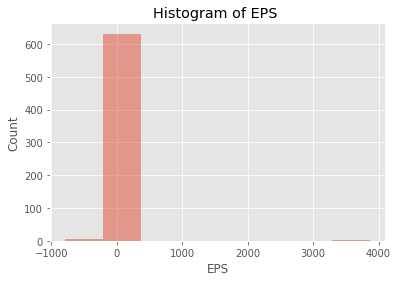

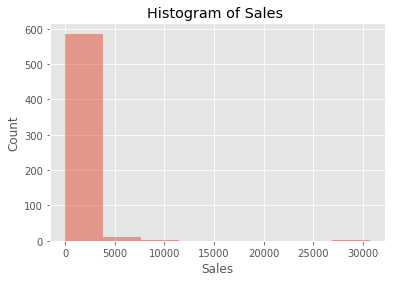

In [31]:
#plot for EPS
plt.hist(df["C3"], bins=8, alpha=0.5)
plt.xlabel('EPS')
plt.ylabel('Count')
plt.title('Histogram of EPS ')
plt.show()

#plot for Sales 
plt.hist(df["C7"], bins=8, alpha=0.5)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Histogram of Sales ')
plt.show()

## Step 6: Imputing our missing data for rows C3/C7 
We decided to use the median to impute our missing values. We did this becasue of the huge variance these two rows have. 
We also create a dummy column (C3_Impute and C7_Impute) to show us which records we used imputed data.

In [32]:
#indicating which rows are missing data that will need to be imputed for our dummy column
df['C7_Impute'] = np.where(df['C7'].isna(),1,0)
df['C3_Impute'] = np.where(df['C3'].isna(),1,0)

#imputed C7 with the median of C7. Output the median value so we know what it was imputed with
c7_median = df['C7'].median()
print("C7 Median: ", c7_median)
df['C7'] = df['C7'].fillna(c7_median)

#impute C3 with the median of C3. Output the median value so we know what we imputed it with
c3_median = df['C3'].median()
print("C3_Median :" ,c3_median)
df['C3'] = df['C3'].fillna(c3_median)

C7 Median:  107.462
C3_Median : 0.0


## Step 7: Created the new columns that we needed

Based on our Data Dictionary, we had to create 6 new columns for our dataset

In [33]:
## Creating Necessary Variables Y1, Y2, C3', C5', and C6'
## Code found on https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column
df['P(Mid)'] = (df['P(H)'] + df['P(L)']) / 2
df['Y1'] = np.where(df['P(IPO)'] < df['P(Mid)'], 1,0)
df['Y2'] = np.where(df['P(IPO)'] < df['P(1Day)'], 1,0)
df["C3'"] = np.where(df['C3'] > 0, 1, 0)
df["C5'"] = df['C5'] / df['C6']
df["C6'"] = np.where(df['P(IPO)'] > df['P(Mid)'], ((df['P(IPO)'] - df['P(Mid)']) / df['P(Mid)']) * 100,0)

#checking it all worked out fine
df.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,C7_Impute,C3_Impute,P(Mid),Y1,Y2,C3',C5',C6'
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,True,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,0,0,9.0,0,1,1,3.864345,11.111111
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,False,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,0,0,9.0,1,0,0,12.028832,0.000000
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,True,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,0,0,13.0,1,0,0,3.369134,0.000000
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,True,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,0,0,15.0,1,1,0,3.299697,0.000000
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,True,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0,0,20.0,0,1,1,3.726269,5.000000
